In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('../experiment_results/Topology_size_25.05/results.csv')
df2 = pd.read_csv('../experiment_results/Topology_size_24.05/results.csv')

# Corrected filtering on df2 only
df2_filtered = df2[(df2['code'] == "steane") & (df2['error_type'] == "sd6")]

# Append the filtered rows from df2 to df
df_combined = pd.concat([df, df2_filtered], ignore_index=True)

In [5]:
df

,backend,backend_size,code,decoder,distance,cycles,num_samples,error_type,error_probability,logical_error_rate,layout_method,routing_method,translating_method
0,custom_full,350,steane,bposd,9,3,1000,sd6,0.020,0.393,NaN,NaN,NaN
1,custom_full,300,steane,bposd,9,3,1000,sd6,0.020,0.403,NaN,NaN,NaN
2,custom_full,300,steane,bposd,9,3,1000,sd6,0.010,0.292,NaN,NaN,NaN
3,custom_full,300,steane,bposd,9,3,1000,sd6,0.015,0.353,NaN,NaN,NaN
4,custom_full,400,steane,bposd,9,3,1000,sd6,0.020,0.386,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,custom_full,450,color,bposd,13,3,1000,sd6,0.020,0.496,NaN,NaN,NaN
86,custom_full,400,color,bposd,13,3,1000,sd6,0.020,0.484,NaN,NaN,NaN
87,custom_full,500,color,bposd,15,3,1000,sd6,0.010,0.377,NaN,NaN,NaN
88,custom_full,500,color,bposd,15,3,1000,sd6,0.015,0.480,NaN,NaN,NaN


In [6]:
import matplotlib.pyplot as plt

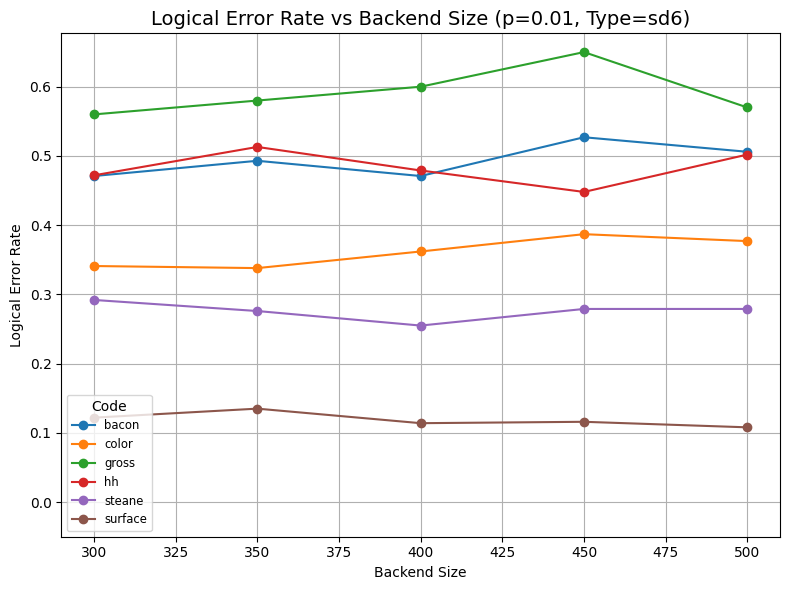

In [10]:
import matplotlib.pyplot as plt

p = 0.01
et = 'sd6'
subset = df[(df['error_probability'] == p) & (df['error_type'] == et)]

# Create a single plot
plt.figure(figsize=(8, 6))

# Plot each code's results (sorted by backend_size)
for code, group in subset.groupby('code'):
    group_sorted = group.sort_values('backend_size')
    plt.plot(group_sorted['backend_size'], group_sorted['logical_error_rate'], label=code, marker='o')

# Plot formatting
plt.title(f'Logical Error Rate vs Backend Size (p={p}, Type={et})', fontsize=14)
plt.ylim(bottom=-0.05)
plt.xlabel('Backend Size')
plt.ylabel('Logical Error Rate')
plt.grid(True)
plt.legend(title='Code', fontsize='small')

# Save the plot
plt.tight_layout()
plt.savefig("../data/Topology_size_25.05/size.png")
plt.show()


In [11]:
df1 = pd.read_csv('../experiment_results/Topology_connectivity_25.05/results.csv')
df3 = pd.read_csv('../experiment_results/Topology_connectivity_24.05/results.csv')

# Corrected filtering on df3 only
df3_filtered = df3[(df3['code'] == "steane") & (df3['error_type'] == "sd6")]

# Append the filtered rows from df2 to df
df_combined = pd.concat([df, df3_filtered], ignore_index=True)

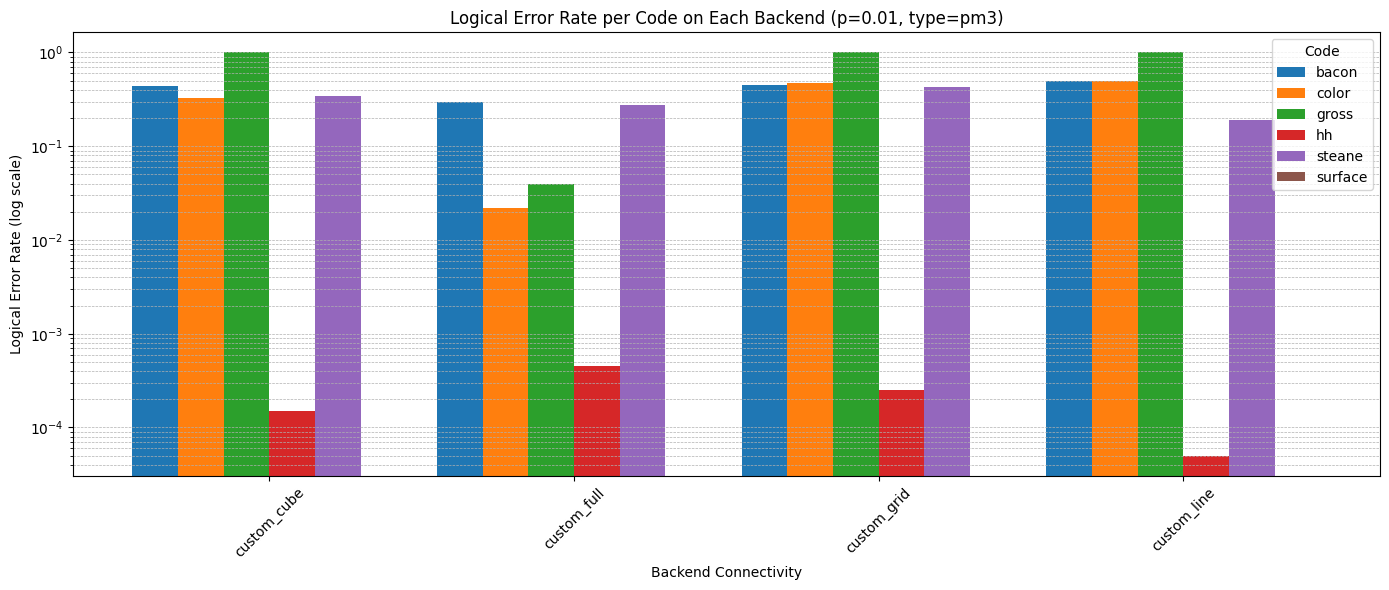

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter for sd6 at p = 0.01
p = 0.01
et = 'sd6'
subset = df1[(df1['error_probability'] == p) & (df1['error_type'] == et)]

# Define custom backend order
custom_order = ['custom_line', 'custom_grid', 'custom_cube', 'custom_full']

# Create pivot table and reindex to enforce custom order
pivot_df = subset.pivot_table(index='backend', columns='code', values='logical_error_rate', aggfunc='mean')
pivot_df = pivot_df.reindex(custom_order)

# Prepare plot data
backends = pivot_df.index
codes = pivot_df.columns
x = np.arange(len(backends))
width = 0.15

# Create the bar plot
fig, ax = plt.subplots(figsize=(14, 6))

for i, code in enumerate(codes):
    ax.bar(x + i * width, pivot_df[code], width, label=code)

# Formatting
ax.set_yscale('log')  # Logarithmic scale for error rate
ax.set_xlabel('Backend Connectivity')
ax.set_ylabel('Logical Error Rate (log scale)')
ax.set_title(f'Logical Error Rate per Code on Each Backend (p={p}, type={et})')
ax.set_xticks(x + width * (len(codes) - 1) / 2)
ax.set_xticklabels(backends, rotation=45)
ax.legend(title='Code')
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig("../data/Topology_connectivity_25.05/barplot_sd6_log.png")
plt.show()
